In [67]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv(r"C:\Users\hp\Desktop\data science learning\data_science_salary\data\Partially Cleaned Salary Dataset.csv")
data.head(3)

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0


In [9]:
data.info

<bound method DataFrame.info of       Unnamed: 0               Company Name  \
0              0                   Mu Sigma   
1              1                        IBM   
2              2  Tata Consultancy Services   
3              3           Impact Analytics   
4              4                  Accenture   
...          ...                        ...   
4334        4339                    TaiyōAI   
4335        4340    Decimal Point Analytics   
4336        4341                     MyWays   
4337        4342  Market Pulse Technologies   
4338        4343                    vPhrase   

                                 Job Title  Salaries Reported   Location  \
0                           Data Scientist                105  Bangalore   
1                           Data Scientist                 95  Bangalore   
2                           Data Scientist                 66  Bangalore   
3                           Data Scientist                 40  Bangalore   
4                      

In [11]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0               Company Name  \
0              0                   Mu Sigma   
1              1                        IBM   
2              2  Tata Consultancy Services   
3              3           Impact Analytics   
4              4                  Accenture   
...          ...                        ...   
4334        4339                    TaiyōAI   
4335        4340    Decimal Point Analytics   
4336        4341                     MyWays   
4337        4342  Market Pulse Technologies   
4338        4343                    vPhrase   

                                 Job Title  Salaries Reported   Location  \
0                           Data Scientist                105  Bangalore   
1                           Data Scientist                 95  Bangalore   
2                           Data Scientist                 66  Bangalore   
3                           Data Scientist                 40  Bangalore   
4                    

In [13]:
data.isnull().sum()

Unnamed: 0           0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

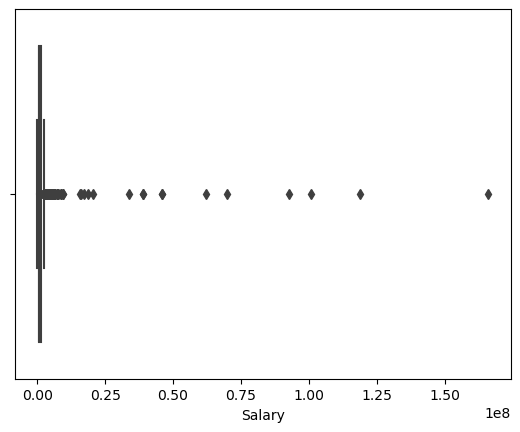

In [15]:
sns.boxplot(x="Salary", data = data)
plt.show()

In [19]:
q1 = data['Salary'].quantile(0.25)
q3 = data['Salary'].quantile(0.75)
iqr = q3 - q1
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)

In [21]:
data1 = data[data['Salary'] <= max_r]
data1.head(3)

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0


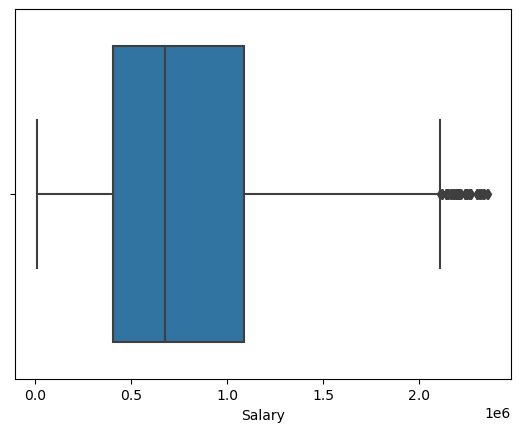

In [23]:
sns.boxplot(x="Salary", data = data1)
plt.show()

In [75]:
x = data1[["Job Title", "Location"]]  # Independent vars
y = data1["Salary"]  

In [77]:
categorical_features = ["Job Title", "Location"]

# Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [81]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Job Title', 'Location'])])),
                ('regressor', LinearRegression())])

In [85]:
# Predict on test set
y_pred = model.predict(x_test)

print("Predicted salaries:", y_pred)


Predicted salaries: [ 660503.24407176  905921.8554224   967663.77380772  967663.77380772
  905921.8554224   967663.77380772  866448.18331654  866448.18331654
  790040.11831803  709126.72059314  802796.28668286  891255.70880921
  538354.76143199  802796.28668286  967663.77380772  626814.18355834
  829513.79042389  761718.83456294  660503.24407176  761718.83456294
  866448.18331654  967663.77380772  626814.18355834  967663.77380772
  565072.26517302  967663.77380772  866448.18331654  829513.79042389
  802796.28668286  761718.83456294  802796.28668286  967663.77380772
  574222.06958853  709126.72059314  915071.65983792  525598.59306716
  967663.77380772  915071.65983792  626814.18355834  967663.77380772
  905921.8554224   879204.35168138  660503.24407176  915071.65983792
  967663.77380772  626814.18355834  891255.70880921  891255.70880921
  915071.65983792  565072.26517302  905921.8554224   761718.83456294
  790040.11831803  538354.76143199  829513.79042389  829513.79042389
  967663.77380

In [103]:
model.score(y_pred, y_test)

ValueError: X does not contain any features, but ColumnTransformer is expecting 2 features

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 372533.9689077191
MSE: 218120305240.15143
RMSE: 467033.51618502865
R²: 0.14230321925164024


In [105]:
z = pd.DataFrame({"Job Title": ["Data Scientist"], "Location": ["Pune"]})
print("Predicted Salary:", model.predict(z))

Predicted Salary: [866448.18331654]
